# Support Vector Regression (SVR)

## Importing the libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [37]:
data = pd.read_csv("../data/Position_Salaries.csv")
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [38]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [39]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Training the SVR model on the whole dataset

In [42]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X, y)

/home/akram/Documents/AI_DataScience_course/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [44]:
y_pred = regressor.predict(sc_X.transform([[6.5]]))
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
print(y_pred)

[[170370.0204065]]


## Visualising the SVR results

Text(0, 0.5, 'Salary')

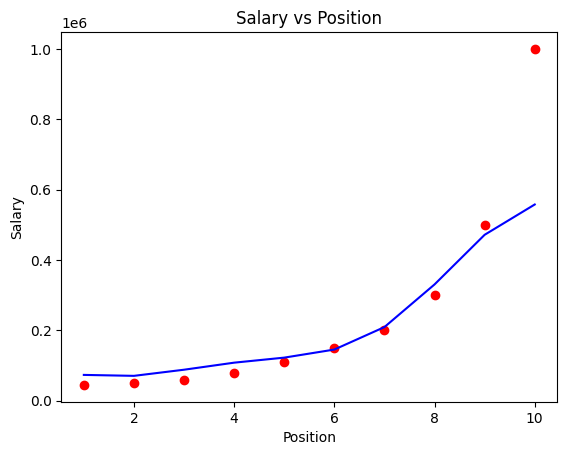

In [48]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color="blue")
plt.title("Salary vs Position")
plt.xlabel("Position")
plt.ylabel("Salary")

## Visualising the SVR results (for higher resolution and smoother curve)

/tmp/ipykernel_19130/3548970422.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


Text(0, 0.5, 'Salary')

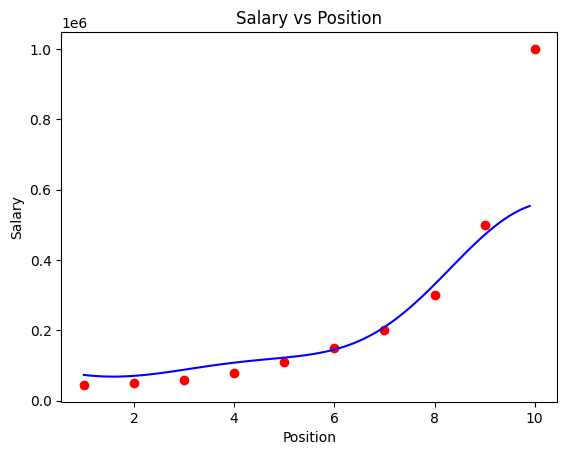

In [51]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color="blue")
plt.title("Salary vs Position")
plt.xlabel("Position")
plt.ylabel("Salary")